# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"


In [5]:
# Importing JSON to use json.dumps to format data


In [6]:
# Fetch current BTC price
btc_current_price_data = requests.get(btc_url).json()
print(json.dumps(btc_current_price_data, indent=4))


# Fetch current ETH price
eth_current_price_data = requests.get(eth_url).json()
print(json.dumps(eth_current_price_data, indent=4))

# Compute current value of my crpto
btc_current_price = btc_current_price_data['data']['1']['quotes']['USD']['price']
eth_current_price = eth_current_price_data['data']['1027']['quotes']['USD']['price']
my_btc_value = my_btc * btc_current_price
my_eth_value = my_eth * eth_current_price
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19203331,
            "total_supply": 19203331,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 16710.6,
                    "volume_24h": 79396826571,
                    "market_cap": 321058711881,
                    "percentage_change_1h": 1.35723575650595,
                    "percentage_change_24h": -10.5831787097339,
                    "percentage_change_7d": -17.1223842229199,
                    "percent_change_1h": 1.35723575650595,
                    "percent_change_24h": -10.5831787097339,
                    "percent_change_7d": -17.1223842229199
                }
            },
            "last_updated": 1668060295
        }
    },
    "metadata": {
        "timestamp": 1668060295,
        "num_crypt

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
alpaca_key = os.getenv('API_Key')
alpaca_secret_key = os.getenv('Secret_Code')
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_key,
    alpaca_secret_key,
    api_version="v2"
)
type(alpaca_key)

str

In [9]:
# Format current date as ISO format
today = pd.Timestamp('2022-11-9', tz='America/New_York').isoformat()
# Set the tickers
ticker = ['AGG', 'SPY']

# Set timeframe to "1Day" for Alpaca API
timeframe = '1Day'

# Get current closing prices for SPY and AGG
stocks_and_bonds_port_df = alpaca.get_bars(
    ticker,
    timeframe,
    start=today,
    end=today
).df

stocks_and_bonds_port_df
# Reorganize the DataFrame
# Separate ticker data
AGG = stocks_and_bonds_port_df[stocks_and_bonds_port_df['symbol']=='AGG'].drop('symbol', axis=1)
SPY = stocks_and_bonds_port_df[stocks_and_bonds_port_df['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
stocks_and_bonds_port_df = pd.concat([AGG,SPY],axis=1, keys=['AGG','SPY'])
# Preview DataFrame
stocks_and_bonds_port_df.head()

AGG                                              \
                            open     high    low  close   volume trade_count   
timestamp                                                                      
2022-11-09 05:00:00+00:00  94.39  94.7001  94.25  94.55  6729388       27655   

                                        SPY                                    \
                               vwap    open    high     low   close    volume   
timestamp                                                                       
2022-11-09 05:00:00+00:00  94.49464  379.93  381.14  373.61  374.13  78000724   

                                                   
                          trade_count        vwap  
timestamp                                          
2022-11-09 05:00:00+00:00      589798  377.164083

In [10]:
# Pick AGG and SPY close prices
agg_close_price = float(stocks_and_bonds_port_df['AGG']['close'])
spy_close_price = float(stocks_and_bonds_port_df['SPY']['close'])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $94.55
Current SPY closing price: $374.13


In [11]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $18706.50
The current value of your 200 AGG shares is $18910.00


### Savings Health Analysis

In [38]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
shares = my_agg_value + my_spy_value
crypto = my_btc_value + my_eth_value

# Setting tickers
ticker = ['shares','crypto']

# Create savings DataFrame
savings_data = {
    "amount":[shares, crypto]
}
df_savings = pd.DataFrame(savings_data,index=ticker)
# Display savings DataFrame
display(df_savings)

,amount
shares,37616.500
crypto,26357.494


array([<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>],
      dtype=object)

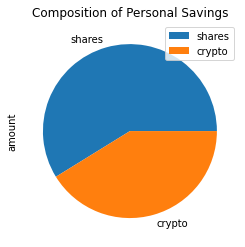

In [39]:
# Plot savings pie chart
df_savings.plot.pie(title={'Composition of Personal Savings'}, ylabel='amount',subplots=True)

In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = shares + crypto
# Validate saving health
# Settign up my IF statements
if total_savings > emergency_fund:
    print(f"Congrats! You are Ballin, don't stop now!")
if total_savings == emergency_fund:
    print(f"Eh. You are about to be Ballin. Keep working.")
if total_savings < emergency_fund:
    print(f"Bro you are ${emergency_fund - total_savings} away from being a Baby Baller!")

Congrats! You are Ballin, don't stop now!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-11-09', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-11-09', tz='America/New_York').isoformat()
# Setting timeframe
timeframe='1Day'

In [21]:
# Get 5 years' worth of historical data for SPY and AGG
# Setting tickers
tickers = ['AGG','SPY']

# Creating DataFrame
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df
# Reorganize the DataFrame
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol',axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol',axis=1)
# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG,SPY],axis=1, keys=['AGG','SPY'])
# Display sample data
df_stock_data.head()

AGG                                    \
                             open    high     low    close   volume   
timestamp                                                             
2017-11-09 05:00:00+00:00  109.39  109.46  109.30  109.430  2479826   
2017-11-10 05:00:00+00:00  109.06  109.15  108.97  108.990  1751136   
2017-11-13 05:00:00+00:00  109.11  109.11  108.96  108.990  1891563   
2017-11-14 05:00:00+00:00  109.01  109.12  109.00  109.100  2799967   
2017-11-15 05:00:00+00:00  109.26  109.38  109.14  109.335  2496168   

                                                      SPY                    \
                          trade_count        vwap    open      high     low   
timestamp                                                                     
2017-11-09 05:00:00+00:00       10095  109.404273  257.73  258.3900  256.36   
2017-11-10 05:00:00+00:00        7642  109.034170  257.73  258.2926  257.37   
2017-11-13 05:00:00+00:00        8098  109.021309  257.30  258.5900  257.27   
2017-11-14 05:00:00+00:00       11233  109.088460  257.41  257.8500  256.52   
2017-11-15 05:00:00+00:00        8706  109.273074  256.62  257.2200  255.63   

                                                                       
                              close    volume trade_count        vwap  
timestamp                                                              
2017-11-09 05:00:00+00:00  258.1908  95115637      349621  257.756200  
2017-11-10 05:00:00+00:00  258.1000  59984662      176651  257.956079  
2017-11-13 05:00:00+00:00  258.3400  51392695      149087  258.137686  
2017-11-14 05:00:00+00:00  257.7500  61739527      204505  257.563860  
2017-11-15 05:00:00+00:00  256.4200  81516581      257052  256.625509

In [22]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_60_40_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.40,0.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [24]:
# Printing the simulation input data
MC_60_40_dist.portfolio_data.head()

AGG                                    \
                             open    high     low    close   volume   
timestamp                                                             
2017-11-09 05:00:00+00:00  109.39  109.46  109.30  109.430  2479826   
2017-11-10 05:00:00+00:00  109.06  109.15  108.97  108.990  1751136   
2017-11-13 05:00:00+00:00  109.11  109.11  108.96  108.990  1891563   
2017-11-14 05:00:00+00:00  109.01  109.12  109.00  109.100  2799967   
2017-11-15 05:00:00+00:00  109.26  109.38  109.14  109.335  2496168   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-11-09 05:00:00+00:00       10095  109.404273          NaN  257.73   
2017-11-10 05:00:00+00:00        7642  109.034170    -0.004021  257.73   
2017-11-13 05:00:00+00:00        8098  109.021309     0.000000  257.30   
2017-11-14 05:00:00+00:00       11233  109.088460     0.001009  257.41   
2017-11-15 05:00:00+00:00        8706  109.273074     0.002154  256.62   

                                                                             \
                               high     low     close    volume trade_count   
timestamp                                                                     
2017-11-09 05:00:00+00:00  258.3900  256.36  258.1908  95115637      349621   
2017-11-10 05:00:00+00:00  258.2926  257.37  258.1000  59984662      176651   
2017-11-13 05:00:00+00:00  258.5900  257.27  258.3400  51392695      149087   
2017-11-14 05:00:00+00:00  257.8500  256.52  257.7500  61739527      204505   
2017-11-15 05:00:00+00:00  257.2200  255.63  256.4200  81516581      257052   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-11-09 05:00:00+00:00  257.756200          NaN  
2017-11-10 05:00:00+00:00  257.956079    -0.000352  
2017-11-13 05:00:00+00:00  258.137686     0.000930  
2017-11-14 05:00:00+00:00  257.563860    -0.002284  
2017-11-15 05:00:00+00:00  256.625509    -0.005160

In [25]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_60_40_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/milluminatillc/Desktop/Module5/Module_5_Homework/Module_5_Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.011120,1.005618,1.004503,0.992656,1.002076,0.997717,0.986558,0.990072,1.002927,1.000156,...,1.002283,1.006431,1.000110,0.997940,0.989706,0.997309,0.996895,0.997935,0.996609,0.995787
2,1.014801,0.996367,1.011283,0.985388,1.004387,1.003488,0.980066,0.989570,1.004567,0.993069,...,1.012105,1.006018,1.009444,0.996998,1.003170,0.994777,0.999290,0.988157,0.998348,0.988865
3,1.027425,0.996640,1.000269,0.996375,1.014316,1.006721,0.983631,0.994337,0.993212,0.985169,...,1.006225,1.010156,1.004957,0.986255,1.011596,1.005504,1.014700,0.995404,1.015659,0.974156
4,1.012944,0.998163,0.998473,1.007374,1.008910,1.020505,0.987257,0.988914,0.995772,0.998718,...,1.003712,1.010091,1.002832,0.965965,1.016504,1.009069,1.018707,0.996938,1.006613,0.971079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,12.631601,5.126665,4.281238,5.285566,0.512802,9.368507,1.370061,2.024019,6.478320,19.680892,...,1.576308,4.358501,4.582270,4.251834,6.402196,9.422757,4.197194,3.410566,3.638363,9.874536
7557,12.550901,5.103769,4.290812,5.143503,0.518948,9.391748,1.368134,2.021341,6.401321,19.606171,...,1.583610,4.430510,4.552133,4.191347,6.322962,9.377987,4.161356,3.438101,3.698546,9.909931
7558,12.415108,5.059811,4.340678,5.204770,0.518607,9.258265,1.390538,2.015941,6.391690,19.657219,...,1.589250,4.468169,4.633966,4.231324,6.324522,9.445316,4.143552,3.467351,3.673416,10.013085
7559,12.392972,5.069571,4.313582,5.171861,0.522428,9.312198,1.400872,1.991889,6.271342,19.568428,...,1.596521,4.466465,4.588146,4.243617,6.395830,9.479035,4.194085,3.478092,3.667805,9.890952


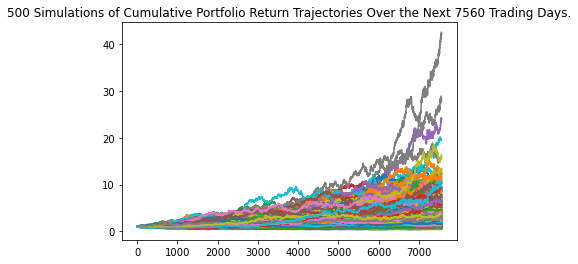

In [26]:
# Plot simulation outcomes
line_plot = MC_60_40_dist.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

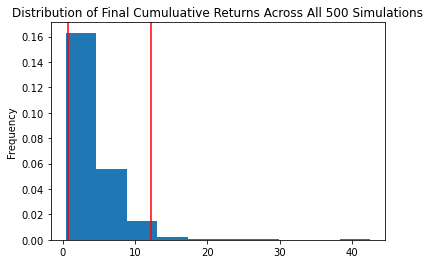

In [27]:
# Plot probability distribution and confidence intervals
MC_60_40_dist.plot_distribution()

### Retirement Analysis

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_60_40_dist.summarize_cumulative_return()
# Print summary statistics
print(tbl)

count           500.000000
mean              4.254072
std               3.551239
min               0.425900
25%               2.143874
50%               3.419098
75%               5.329072
max              42.510825
95% CI Lower      0.780271
95% CI Upper     12.251535
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [30]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $15605.41 and $245030.69


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [31]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $23408.12 and $367546.04


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [33]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_early_5_year_retirement = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.40,0.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [34]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_early_5_year_retirement.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/milluminatillc/Desktop/Module5/Module_5_Homework/Module_5_Homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.985879,0.997661,0.995983,1.001715,1.011589,1.005203,1.001837,0.997609,0.997991,0.994080,...,1.017918,0.989162,0.994894,0.990962,1.002838,1.004709,0.996853,0.998990,1.004138,0.989694
2,0.999751,1.004944,0.994471,1.006194,1.029029,1.005848,1.000076,0.995230,1.004762,0.999950,...,1.012836,0.990925,1.003042,0.988256,0.996736,0.997697,1.011307,0.996655,1.014226,0.980722
3,1.019753,1.007854,1.002060,0.996765,1.028942,1.016972,1.000301,0.998209,1.002360,1.000237,...,1.013237,0.994677,1.013080,0.982247,1.005412,1.001080,1.016170,0.983043,1.016854,0.985515
4,1.006867,1.006404,0.989544,0.991691,1.030330,1.013160,1.001313,0.988409,1.009955,0.998184,...,1.007741,0.991291,1.002658,0.978787,1.010850,1.007345,1.015644,0.990781,1.010229,0.974930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.823495,1.155187,1.114867,1.151633,1.175571,1.442675,1.101831,1.325873,1.144808,1.433204,...,0.948277,1.396928,1.384930,1.010323,1.003462,0.988066,1.373887,0.675463,1.218823,1.019668
1257,1.830162,1.153832,1.100924,1.153096,1.171005,1.413878,1.098649,1.338339,1.147552,1.410740,...,0.950704,1.412893,1.364992,1.017987,1.022139,0.979282,1.357517,0.674103,1.216166,1.023243
1258,1.815391,1.145320,1.106163,1.145999,1.171706,1.415218,1.098668,1.322815,1.140161,1.414527,...,0.959039,1.400291,1.376055,1.012538,1.001818,0.983002,1.376284,0.674963,1.203938,1.022254
1259,1.819512,1.138182,1.118473,1.137922,1.175800,1.431866,1.102311,1.329883,1.137705,1.415644,...,0.944307,1.397781,1.398264,1.022381,1.010229,0.982007,1.369464,0.682698,1.217023,1.006602


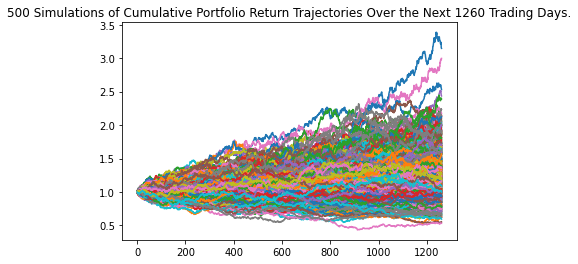

In [35]:
# Plot simulation outcomes
line_plot = MC_early_5_year_retirement.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

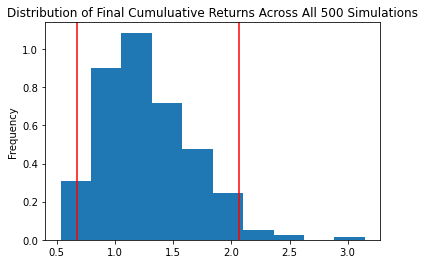

In [36]:
# Plot probability distribution and confidence intervals
MC_early_5_year_retirement.plot_distribution()

In [37]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_early_5_year_retirement.summarize_cumulative_return()
# Print summary statistics
print(tbl)

count           500.000000
mean              1.270288
std               0.377678
min               0.531611
25%               1.004418
50%               1.209013
75%               1.490208
max               3.147293
95% CI Lower      0.675988
95% CI Upper      2.061464
Name: 1260, dtype: float64


In [29]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57091.37 and $95195.55


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004461,1.003269,0.998934,0.996767,1.000906,0.999279,0.995262,1.005752,0.993466,0.993655,...,1.001427,1.004350,0.996932,0.996844,0.997507,1.003457,0.998736,1.001195,0.999904,1.010218
2,1.007901,1.003304,0.993812,0.999973,1.000910,1.002347,0.996311,1.007234,0.993550,0.991021,...,0.997379,1.001952,0.998124,0.998063,1.001733,1.000273,0.994865,1.000109,0.994648,1.007838
3,1.007532,1.001077,0.990963,0.998339,1.001779,1.003653,0.994439,1.012230,0.999170,0.996484,...,0.995265,1.001745,0.995332,1.003023,1.003800,0.999755,0.997616,1.004730,0.993391,1.010444
4,1.020339,1.005743,0.991869,0.998218,1.005630,1.008717,0.987764,1.012750,0.999227,0.996474,...,0.999028,1.004730,0.995357,1.000204,1.008738,0.999273,0.999426,1.003776,0.991478,1.013379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.616922,1.761703,1.143430,1.687801,1.743826,1.174891,1.514199,2.447129,1.589765,1.570578,...,1.316494,1.863650,1.727959,1.411033,1.804671,1.500605,1.413278,1.552375,1.318340,1.960015
2517,1.620285,1.769184,1.145132,1.695693,1.742878,1.175745,1.517697,2.441471,1.586174,1.560826,...,1.318463,1.857860,1.724003,1.409092,1.810136,1.499466,1.413210,1.552539,1.316872,1.956776
2518,1.622141,1.771927,1.149019,1.691589,1.739420,1.178965,1.522624,2.444413,1.580680,1.566154,...,1.317147,1.864694,1.727503,1.419561,1.821212,1.492831,1.412283,1.556659,1.318842,1.961271
2519,1.628885,1.770207,1.149670,1.703935,1.738053,1.182429,1.519485,2.441360,1.565663,1.576607,...,1.307985,1.858986,1.728039,1.430017,1.814690,1.496851,1.409284,1.562660,1.324798,1.964190


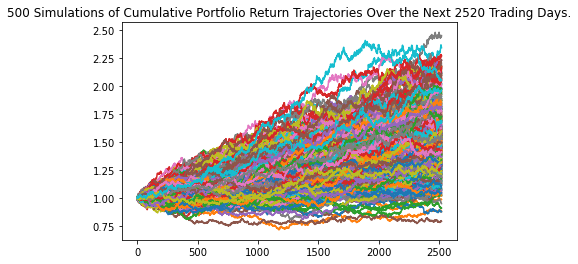

In [32]:
# Plot simulation outcomes
# YOUR CODE HERE!

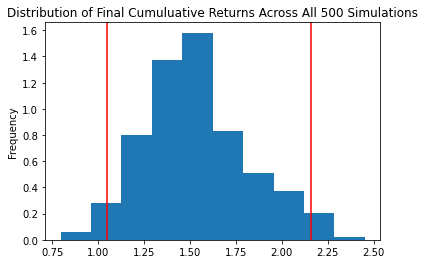

In [33]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.537014
std               0.282192
min               0.795263
25%               1.339641
50%               1.523799
75%               1.693927
max               2.451787
95% CI Lower      1.049781
95% CI Upper      2.159935
Name: 2520, dtype: float64


In [35]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $62986.85 and $129596.12
